## Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import json
import os
from statistics import mean, stdev
from pprint import pprint

## Read json result files

In [2]:
result_base_path = "./store"
folders = os.listdir(result_base_path)
print(folders)

['ACTIVELR_201642843836559', 'ACTIVELR_836045456929248', 'RANDOM_446965648604211', 'ACTIVELR_509080873186346', 'ACTIVELR_550927855047387', 'ACTIVELR_196607736563306', 'RANDOM_452953560567138', 'RANDOM_827574076404190', 'ACTIVELR_890095546607068', 'RANDOM_896592571838721', 'RANDOM_473590276740433', 'RANDOM_427233740000263', 'RANDOM_889588991073049', 'RANDOM_208682059966262', 'RANDOM_187793462519052', 'ACTIVELR_409439344243863', 'RANDOM_338872239379290', 'ACTIVELR_916760846986108', 'ACTIVELR_673941796291433', 'ACTIVELR_113732133690719']


In [3]:
results_dict = {'Random': [],
                'ActiveLR':[]
                }
for folder in folders:
    with open(os.path.join(result_base_path, folder, "study_metrics.json"), 'r') as fp:
        study_metrics = json.load(fp)

        if 'RANDOM' in folder:
            results_dict['Random'].append([list(range(1, len(study_metrics['iter_accuracy'])+1)), study_metrics['elapsed_time'], study_metrics['iter_accuracy']])
        elif 'ACTIVELR' in folder:
            results_dict['ActiveLR'].append([list(range(1, len(study_metrics['iter_accuracy'])+1)), study_metrics['elapsed_time'], study_metrics['iter_accuracy']])

pprint(results_dict)

{'ActiveLR': [[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
               [3.352044105529785,
                10.33598804473877,
                10.766037940979004,
                11.062244176864624,
                11.221452951431274,
                18.37056612968445,
                18.574583053588867,
                18.823775053024292,
                22.639259099960327,
                22.82302212715149,
                23.14717411994934,
                29.489230155944824,
                35.43958902359009,
                38.30695295333862,
                38.54861307144165,
                40.00572204589844],
               [0.5714285714285714,
                0.7903225806451613,
                0.935064935064935,
                0.927536231884058,
                1.0,
                1.0,
                0.9565217391304348,
                0.9866666666666667,
                1.0,
                0.9206349206349206,
                0.9879518072289156,
           

## Compute Average time and accuracy

In [4]:
'''For Random'''
average_dict = {'Random':[],
                'ActiveLR':[]
                }
for sampling_type in ['Random', 'ActiveLR']:
    for val in zip(*results_dict[sampling_type]):
        idx=0
        average_vals=[]
        candidate_vals = []
        end = False
        while not end:
            end=True
            for exp_lst in val:
                if idx < len(exp_lst) and (str(exp_lst[idx])!='nan'):
                    '''If any found then end is false'''
                    candidate_vals.append(exp_lst[idx])
                    end=False
            else:
                idx += 1
                # print(mean(candidate_vals), candidate_vals)
                average_vals.append(mean(candidate_vals))

        average_dict[sampling_type].append(average_vals)
        
    



In [5]:
pprint(average_dict)

{'ActiveLR': [[1,
               1.5,
               2,
               2.5,
               3,
               3.5,
               4,
               4.5,
               5,
               5.5,
               6,
               6.453781512605042,
               6.866141732283465,
               7.18796992481203,
               7.416058394160584,
               7.539568345323741,
               7.607142857142857,
               7.607142857142857],
              [3.369955801963806,
               7.213322818279266,
               8.831944783528646,
               10.271653258800507,
               11.439972152709961,
               12.731257943312327,
               14.193226439612252,
               15.403429746627808,
               16.743359751171536,
               18.011611258983613,
               19.196178288893265,
               20.213657827938306,
               21.060102744365302,
               21.76852542296388,
               22.234317332288644,
               22.490351543152077

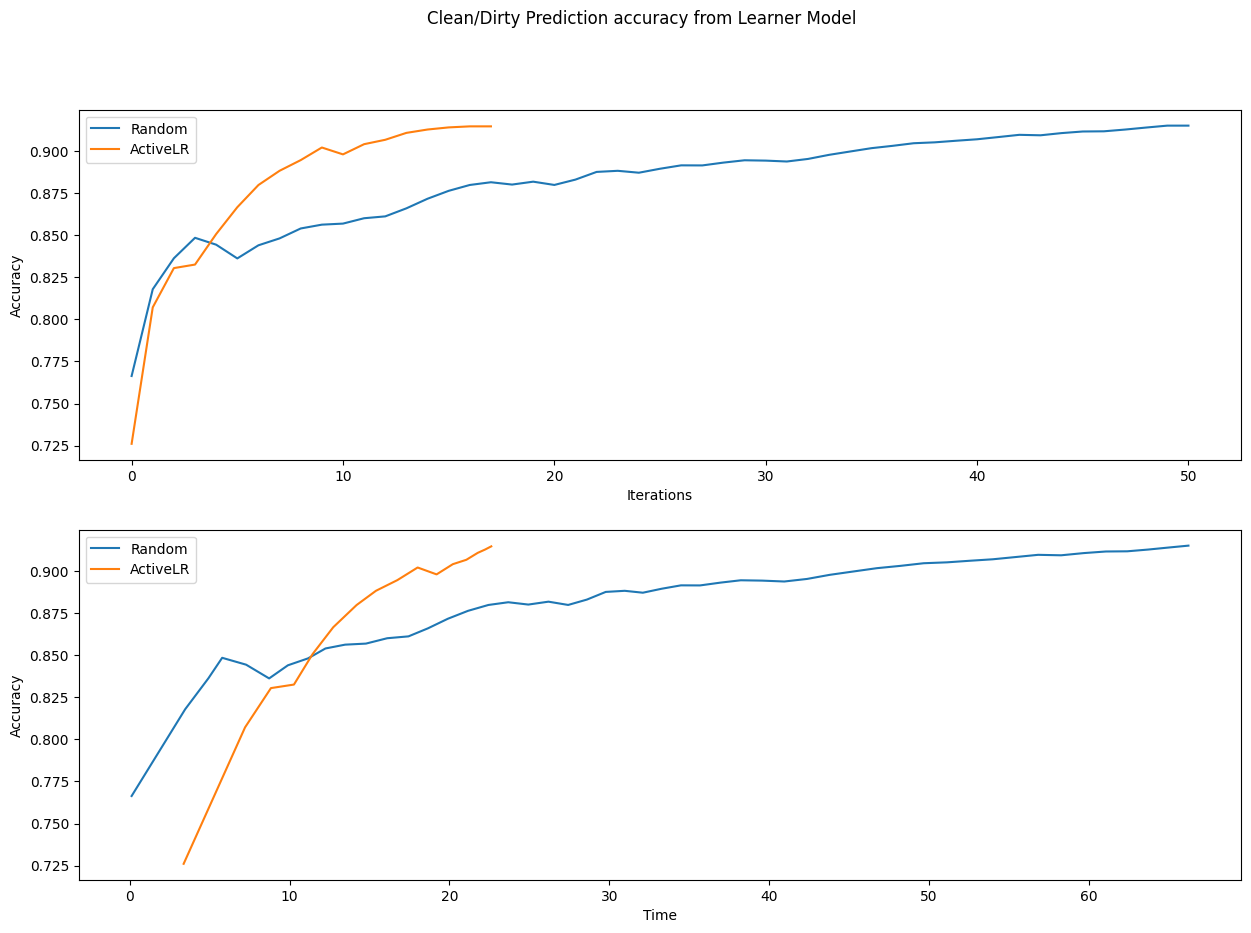

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(average_dict['Random'][2], label='Random')
plt.plot(average_dict['ActiveLR'][2], label='ActiveLR')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(average_dict['Random'][1], average_dict['Random'][2], label='Random')
plt.plot(average_dict['ActiveLR'][1], average_dict['ActiveLR'][2], label='ActiveLR')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.suptitle("Clean/Dirty Prediction accuracy from Learner Model")
plt.legend()
plt.show()